In [8]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib


In [9]:
alien_df = pd.read_csv('../project-1-alien-analysis/ufo_dates.csv') 
                      
#Suggested on Stackoverflow to establish datatypes at the beginning as parsing requires a lot of memory from Pandas                        
#                     dtype={"city": "string", "state": "string", 
#                                                                             "country": "string", "shape": "string", "duration (seconds)": int,
#                                                                            "latitude": int, "longitude": int, "Month": int,  "Day": int, 
#                                                                             "Time": int, "Year": int})

alien_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1995 19:45,milwaukee,wi,us,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,10,10,19:45,1995


In [10]:
#Binning states into regions 

def label_states (row):
    if row['state'] in ['ct', 'me', 'nh', 'vt', 'ma', 'ri', 'ct', 'ny', 'pa', 'nj']:
        return 'North-East'
    if row['state'] in ['wi', 'mi', 'il', 'in', 'oh', 'nd', 'sd', 'ne', 'mn', 'ia', 'mo', 'ks']:
        return 'Midwest'
    if row['state'] in ['de', 'md', 'dc', 'va', 'wv', 'nc', 'sc', 'ga', 'fl', 'ky', 'tn', 'ms', 'al', 'ok', 'tx', 'ar', 'la']:
        return 'South'
    if row['state'] in ['wa', 'or', 'ca', 'nv', 'ut', 'az', 'nm', 'co', 'wy', 'id', 'mt', 'ak', 'hi']:
        return 'West'

region_df = pd.DataFrame([{'state':"al"}, {'state':"ak"}, {'state':"az"}, {'state':"ar"}, {'state':"ca"}, {'state':"co"}, 
                         {'state':"ct"}, {'state':"de"}, {'state':"dc"}, {'state':"fl"}, {'state':"ga"}, {'state':"hi"}, {'state':"id"},
                         {'state':"il"}, {'state':"in"}, {'state':"ia"}, {'state':"ks"}, {'state':"ky"}, {'state':"la"}, {'state':"me"},
                         {'state':"md"}, {'state':"ma"}, {'state':"mi"}, {'state':"mn"}, {'state':"ms"}, {'state':"mo"}, {'state':"mt"}, {'state':"ne"}, 
                          {'state':"nv"}, {'state':"nh"}, {'state':"nj"}, {'state':"nm"}, {'state':"ny"}, {'state':"nc"}, {'state':"nd"}, {'state':"oh"}, 
                         {'state':"ok"}, {'state':"or"}, {'state':"pa"}, {'state':"ri"}, {'state':"sc"}, {'state':"sd"}, {'state':"tn"}, {'state':"tx"}, {'state':"ut"}, 
                         {'state':"vt"}, {'state':"va"}, {'state':"wa"}, {'state':"wv"}, {'state':"wi"}, {'state':"wy"}])

region_df['region'] = region_df.apply(lambda row: label_states(row), axis=1)

region_df

,state,region
0,al,South
1,ak,West
2,az,West
3,ar,South
4,ca,West
5,co,West
6,ct,North-East
7,de,South
8,dc,South
9,fl,South


In [12]:
# reading in population data metric
# first read in file 
pop_df = pd.read_csv('../project-1-alien-analysis/pop.csv') 

# choose the columns and rows you want
pop_df_1=pop_df.iloc[8:59, [0, 1]]


# clean and rename



pop_df_1.columns=["State", "Population"]

# build a new dataframe with states and abbreviations

state_df = pd.DataFrame([ {'state':"al", 'State':".Alabama"},    {'state':"ak", 'State':".Alaska"}, 
                          {'state':"az", 'State':".Arizona"},    {'state':"ar", 'State':".Arkansas"},
                          {'state':"ca", 'State':".California"}, {'state':"co", 'State':".Colorado"}, 
                          {'state':"ct", 'State':".Connecticut"},{'state':"de", 'State':".Delaware"}, 
                          {'state':"dc", 'State':".District of Columbia"}, {'state':"fl", 'State':".Florida"}, 
                          {'state':"ga", 'State':".Georgia"}, {'state':"hi", 'State':".Hawaii"}, 
                          {'state':"id", 'State':".Idaho"}, {'state':"il", 'State':".Illinois"}, 
                          {'state':"in", 'State':".Indiana"}, {'state':"ia", 'State':".Iowa"},
                          {'state':"ks", 'State':".Kansas"}, {'state':"ky", 'State':".Kentucky"},
                          {'state':"la", 'State':".Louisiana"}, {'state':"me", 'State':".Maine"},
                          {'state':"md", 'State':".Maryland"}, {'state':"ma", 'State':".Massachusetts"}, 
                          {'state':"mi", 'State':".Michigan"}, {'state':"mn", 'State':".Minnesota"}, 
                          {'state':"ms", 'State':".Mississippi"}, {'state':"mo", 'State': ".Missouri"}, 
                          {'state':"mt", 'State':".Montana"}, {'state':"ne", 'State':".Nebraska"}, 
                          {'state':"nv", 'State':".Nevada"}, {'state':"nh", 'State':".New Hampshire"}, 
                          {'state':"nj", 'State':".New Jersey"}, {'state':"nm", 'State':".New Mexico"}, 
                          {'state':"ny", 'State':".New York"}, {'state':"nc", 'State':".North Carolina"}, 
                          {'state':"nd", 'State':".North Dakota"}, {'state':"oh", 'State':".Ohio"}, 
                          {'state':"ok", 'State':".Oklahoma"}, {'state':"or", 'State':".Oregon"},
                          {'state':"pa", 'State':".Pennsylvania"}, {'state':"ri", 'State':".Rhode Island"},
                          {'state':"sc", 'State':".South Carolina"}, {'state':"sd", 'State':".South Dakota"},
                          {'state':"tn", 'State':".Tennessee"}, {'state':"tx", 'State':".Texas"},
                          {'state':"ut", 'State':".Utah"}, {'state':"vt", 'State':".Vermont"}, 
                          {'state':"va", 'State':".Virginia"}, {'state':"wa", 'State':".Washington"},
                          {'state':"wv", 'State':".West Virginia"}, {'state':"wi", 'State':".Wisconsin"},
                          {'state':"wy", 'State':".Wyoming"}])



#Join it to population data
state_pop = pd.merge(pop_df_1, state_df, on='State', how='right')

state_pop





,State,Population,state
0,.Alabama,"4,779,736",al
1,.Alaska,"710,231",ak
2,.Arizona,"6,392,017",az
3,.Arkansas,"2,915,918",ar
4,.California,"37,253,956",ca
5,.Colorado,"5,029,196",co
6,.Connecticut,"3,574,097",ct
7,.Delaware,"897,934",de
8,.District of Columbia,"601,723",dc
9,.Florida,"18,801,310",fl


In [13]:
#Join Regions DF with Aliens DF

alien_region = pd.merge(alien_df, region_df, on='state', how='right')

#Join population data to master data

alien_region_pop= pd.merge(alien_region, state_pop, on='state', how='right')

alien_region_pop.count()


datetime                59576
city                    59576
state                   59576
country                 59576
shape                   58116
duration (seconds)      59576
duration (hours/min)    59576
comments                59565
date posted             59576
latitude                59576
longitude               59576
Month                   59576
Day                     59576
Time                    59576
Year                    59576
region                  59576
State                   59576
Population              59576
dtype: int64

In [14]:
# strip out the NANs and remove the nulls
alien_region_pop['shape'].replace('', np.nan, inplace=True)
alien_region_pop.dropna(subset=['shape'], inplace=True)
alien_region_pop.count()

# remove commas from Population and make population an int
alien_region_pop["Population"].replace(',','', regex=True, inplace=True)

alien_region_pop["Population"]= alien_region_pop["Population"].astype(float)

#Capitilize the state abb.

alien_region_pop["state"]= alien_region_pop["state"].str.upper()
alien_region_pop.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region,State,Population
0,10/10/1993 22:00,peoria,IL,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest,.Illinois,12830632.0
1,10/10/1998 13:15,elgin,IL,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest,.Illinois,12830632.0
2,10/10/2004 15:00,rock island,IL,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest,.Illinois,12830632.0
3,10/10/2010 20:45,sterling,IL,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest,.Illinois,12830632.0
4,10/10/2012 20:30,marion,IL,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest,.Illinois,12830632.0


In [15]:
region_pop=alien_region_pop.groupby(by="region")

avg_pop_region=region_pop["Population"].mean()
shape_frequency=region_pop["shape"].count()

sightings_region=(shape_frequency/avg_pop_region)*100

# grouped by items back into a data frame 

region_pop_df = pd.DataFrame({"Regional Population":avg_pop_region ,
                          "Sighting Frequency by Region":shape_frequency,
                              "Percent of Sightings by Population":sightings_region})
#Arrange the rows  the desired order

region_pop_df.sort_values(["Percent of Sightings by Population"
], inplace=True)

region_pop_df

,Regional Population,Sighting Frequency by Region,Percent of Sightings by Population
region,,,
North-East,1.084896e+07,8972,0.082699
West,1.764208e+07,20161,0.114278
South,1.223092e+07,16897,0.138150
Midwest,8.150945e+06,12086,0.148277


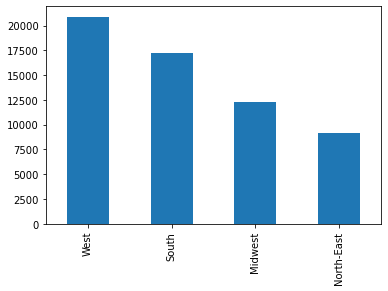

In [16]:
# Data NOT normilized by population 
alien_region['region'].value_counts().plot.bar()

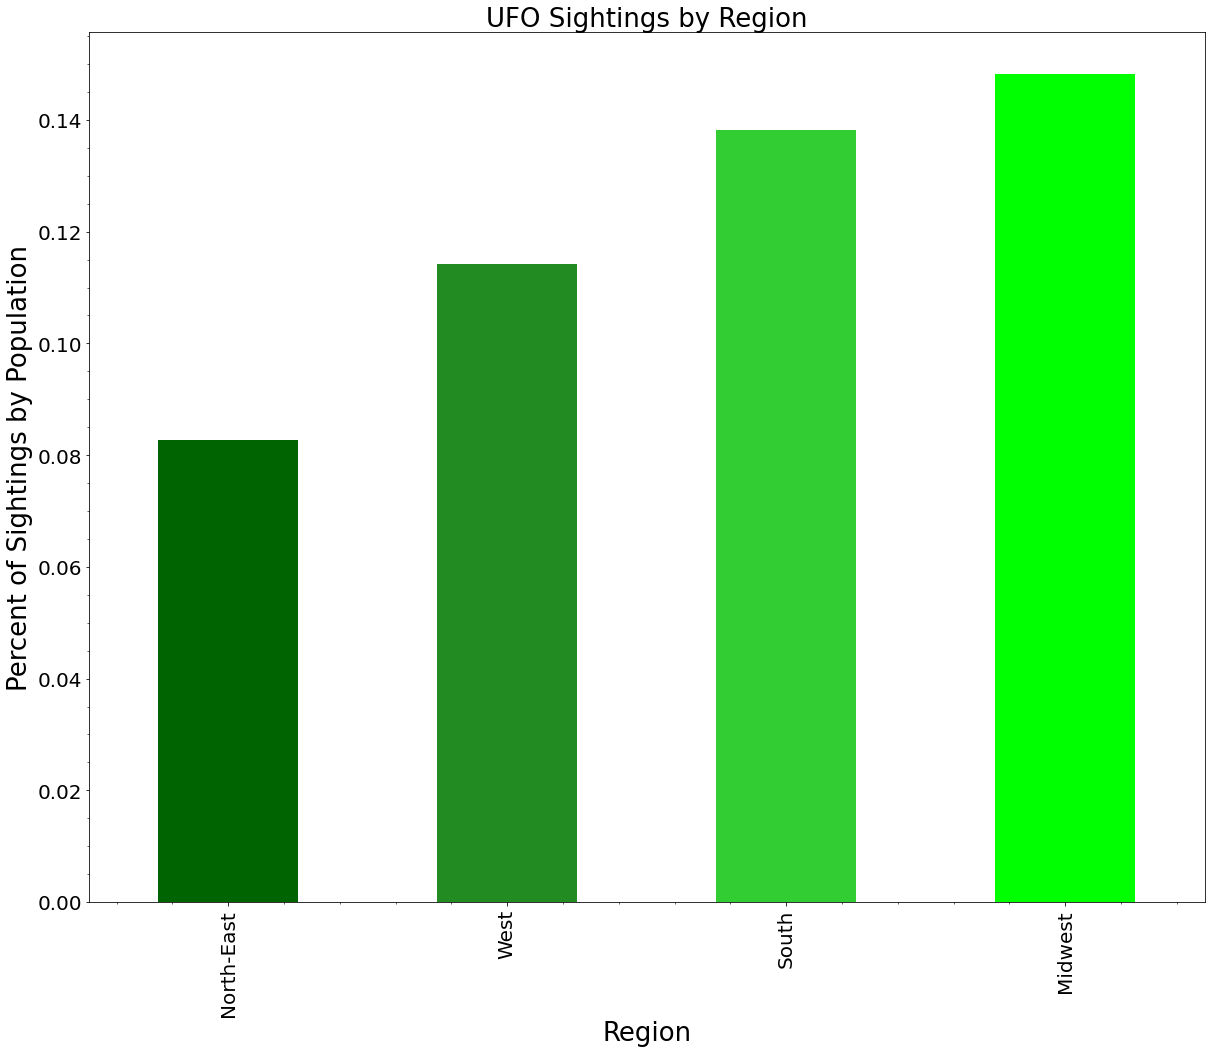

In [19]:
# Data normilized by population 
region_pop_df.plot( y="Percent of Sightings by Population", kind='bar', color=["darkgreen", "forestgreen","limegreen","lime"],  
                 figsize=(20,16), fontsize=20,
                 legend=None, grid=None )

plt.xlabel("Region", fontsize=26)
plt.ylabel("Percent of Sightings by Population", fontsize=26)
plt.title("UFO Sightings by Region", fontsize=26)

plt.minorticks_on()


x_indexes = np.arange(len(region_pop_df))

plt.savefig("region_pop_df.png")
plt.show()

In [20]:
#Graph by state normalizing for population 
state_pop=alien_region_pop.groupby(by="state")

avg_pop_state=state_pop["Population"].mean()
shape_frequency=state_pop["shape"].count()

sightings_state=(shape_frequency/avg_pop_state)*100

# grouped by items back into a data frame 

state_pop_df = pd.DataFrame({"Regional Population":avg_pop_state,
                          "Sighting Frequency by Region":shape_frequency,
                              "Percent of Sightings by Population":sightings_state})
#Arrange the rows  the desired order

state_pop_df.sort_values(["Percent of Sightings by Population"
], inplace=True)




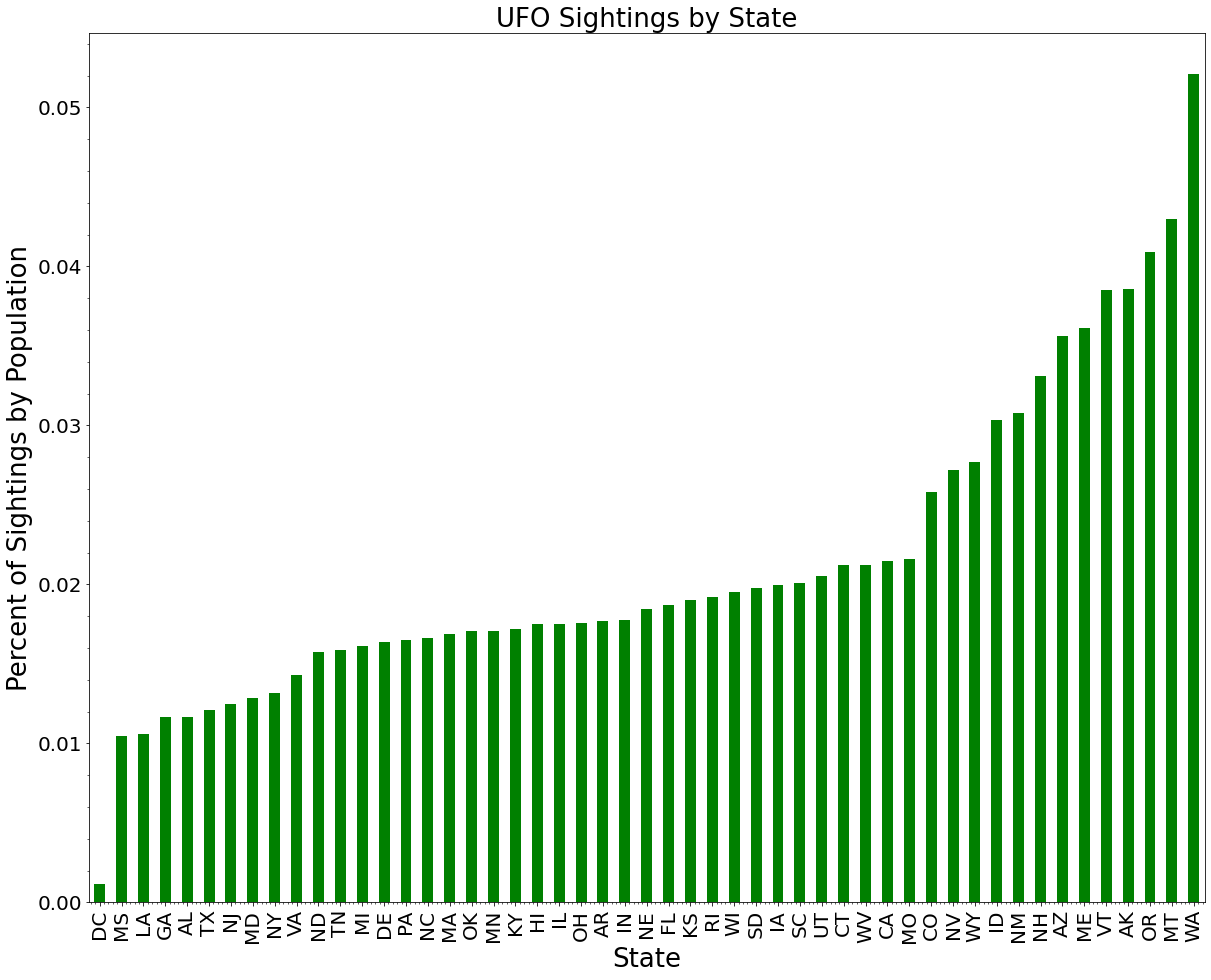

In [219]:
# normilized by population Graph
# cmap = matplotlib.cm.get_cmap('Spectral')
# cmap.set_under("green") 
# GnBu = cmap(-0.5)


state_pop_df.plot( y="Percent of Sightings by Population", kind='bar', color= "g",
                 figsize=(20,16), fontsize=20,
                 legend=None, grid=None )

plt.xlabel("State", fontsize=26)
plt.ylabel("Percent of Sightings by Population", fontsize=26)
plt.title("UFO Sightings by State", fontsize=26)

plt.minorticks_on()


x_indexes = np.arange(len(state_pop_df))

plt.savefig("Count of UFO Sigthings by Shape Type2.png")
plt.show()


In [ ]:
alien_region.to_csv(r'../project-1-alien-analysis\alien_region.csv')
